In [80]:
import os
from dotenv import load_dotenv
from supabase import create_client, Client

load_dotenv()

url = os.getenv("SUPABASE_URL")
key = os.getenv("SUPABASE_KEY")

supabase = create_client(url, key)

# tb_rental_spaces

In [81]:
import pandas as pd
result = supabase.table("rental_spaces").select("*").execute()
data = result.data
df_rentalspaces = pd.DataFrame(data)


In [82]:
df_rentalspaces.head()

,id,name,address,latitude,longitude,telephone,homepage,capacity,category,created_at
0,2,용산도시기억전시관,None,37.5264,126.967,02-3785-2590,https://yeyak.seoul.go.kr/web/reservation/sele...,None,회의실,2025-02-18T16:04:56.555215+00:00
1,3,신도림동 주민센터 >신도림동주민센터 문화교실,None,37.5078,126.881,02-2620-7104,https://yeyak.seoul.go.kr/web/reservation/sele...,None,회의실,2025-02-18T16:04:56.555215+00:00
2,4,고척2동 주민센터,None,37.5067,126.859,02-2620-7906,https://yeyak.seoul.go.kr/web/reservation/sele...,None,회의실,2025-02-18T16:04:56.555215+00:00
3,5,고척1동 주민센터,None,37.5004,126.863,02-2620-7804,https://yeyak.seoul.go.kr/web/reservation/sele...,None,강의실,2025-02-18T16:04:56.555215+00:00
4,6,구로3동주민센터,None,37.4873,126.890,02-2620-7422,https://yeyak.seoul.go.kr/web/reservation/sele...,None,강의실,2025-02-18T16:04:56.555215+00:00


# tb_coffeeshop

In [83]:
import pandas as pd
df_coffee = pd.read_excel("data/seoul_cafe_0219.xlsx")
df_coffee.head()


,상호명,지점명,도로명주소,층정보,경도,위도,시군구코드,시군구명
0,부동산임대김은숙,NaN,서울특별시 종로구 삼청로 122-1,NaN,126.981840,37.586250,11110,종로구
1,한옥,NaN,서울특별시 종로구 인사동12길 9,1,126.984797,37.574601,11110,종로구
2,상록,NaN,서울특별시 종로구 종로17길 52,NaN,126.988556,37.572430,11110,종로구
3,우궁옛날전통찻집,NaN,서울특별시 종로구 인사동4길 9,NaN,126.986654,37.573231,11110,종로구
4,화동커피,NaN,서울특별시 종로구 율곡로3길 82,NaN,126.982271,37.579313,11110,종로구


In [84]:
df_coffee["지점명"] = df_coffee["지점명"].fillna(" ")
df_coffee["지점명"].isna().sum()

df_coffee["층정보"] = df_coffee["층정보"].fillna(" ")
df_coffee["층정보"].isna().sum()

np.int64(0)

In [ ]:
# 상호명+지점명 and 도로명주소+층정보
# 상호명과 지점명 합치기
if df_coffee['지점명'] is not None: 
    df_coffee['store_name'] = df_coffee['상호명'] + ' ' + df_coffee['지점명']
else:
    # NaN 값 처리 (지점명이 없는 경우)
    df_coffee['store_name'] = df_coffee['상호명']


# 도로명주소+층정보 합치기
if df_coffee['층정보'] is not None: 
    df_coffee['address'] = df_coffee['도로명주소'] + ' ' + df_coffee['층정보'] + "층"
else:
    df_coffee['address'] = df_coffee['도로명주소']


In [86]:
df_col = ['store_name',	'address', '위도', '경도', '시군구코드', '시군구명']
df_coffeeshop = df_coffee[df_col]
df_coffeeshop.columns = ['store_name',	'address', 'latitude', 'longitude', 'district_code', 'district_name']
df_coffeeshop

,store_name,address,latitude,longitude,district_code,district_name
0,부동산임대김은숙,서울특별시 종로구 삼청로 122-1 층,37.586250,126.981840,11110,종로구
1,한옥,서울특별시 종로구 인사동12길 9 1층,37.574601,126.984797,11110,종로구
2,상록,서울특별시 종로구 종로17길 52 층,37.572430,126.988556,11110,종로구
3,우궁옛날전통찻집,서울특별시 종로구 인사동4길 9 층,37.573231,126.986654,11110,종로구
4,화동커피,서울특별시 종로구 율곡로3길 82 층,37.579313,126.982271,11110,종로구
...,...,...,...,...,...,...
23336,주희스커피,서울특별시 서대문구 통일로 414 층,37.586483,126.947058,11410,서대문구
23337,인듀어런스커피,서울특별시 강남구 선릉로112길 21-4 층,37.511856,127.045435,11680,강남구
23338,커피차이,서울특별시 광진구 뚝섬로56길 14-1 층,37.530676,127.082453,11215,광진구
23339,스트라스커피,서울특별시 구로구 디지털로31길 12 층,33.474969,124.848488,11530,구로구


데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23341 entries, 0 to 23340
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   store_name     23341 non-null  object 
 1   address        23341 non-null  object 
 2   latitude       23341 non-null  float64
 3   longitude      23341 non-null  float64
 4   district_code  23341 non-null  int64  
 5   district_name  23341 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB
None

결측치 확인:
store_name       0
address          0
latitude         0
longitude        0
district_code    0
district_name    0
dtype: int64


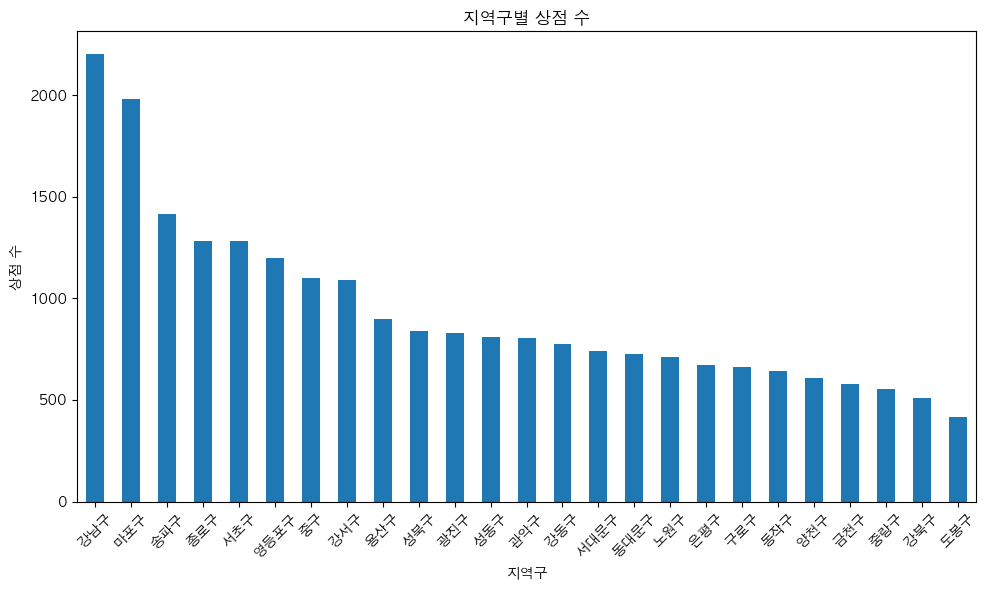

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 기본 정보 출력
print("데이터 기본 정보:")
print(df_coffeeshop.info())

print("\n결측치 확인:")
print(df_coffeeshop.isnull().sum())

# 지역구별 상점 수 시각화
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(10, 6))
df_coffeeshop['district_name'].value_counts().plot(kind='bar')
plt.title('지역구별 상점 수')
plt.xlabel('지역구')
plt.ylabel('상점 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# fetch data to supabase

In [88]:
from supabase import create_client
import pandas as pd
from typing import List, Dict, Any
import math

def insert_dataframe_to_supabase(
    df: pd.DataFrame,
    table_name: str,
    supabase_url: str,
    supabase_key: str,
    chunk_size: int = 1000
) -> tuple[int, List[Dict[str, Any]]]:
    """
    Insert a pandas DataFrame into Supabase table with chunking and error handling.
    
    Args:
        df: pandas DataFrame to insert
        table_name: name of the target Supabase table
        supabase_url: your Supabase project URL
        supabase_key: your Supabase anon/service key
        chunk_size: number of records to insert in each batch
    
    Returns:
        tuple containing:
        - number of successfully inserted records
        - list of failed records with error messages
    """
    # Initialize Supabase client
    supabase = create_client(supabase_url, supabase_key)
    
    # Convert DataFrame to list of dictionaries
    records = df.to_dict('records')
    
    # Calculate number of chunks
    n_chunks = math.ceil(len(records) / chunk_size)
    
    successful_inserts = 0
    failed_records = []
    
    # Process in chunks
    for i in range(n_chunks):
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, len(records))
        chunk = records[start_idx:end_idx]
        
        try:
            # Insert chunk into Supabase
            result = supabase.table(table_name).insert(chunk).execute()
            
            # Count successful insertions
            successful_inserts += len(chunk)
            
            print(f"Successfully inserted chunk {i+1}/{n_chunks} ({len(chunk)} records)")
            
        except Exception as e:
            print(f"Error inserting chunk {i+1}/{n_chunks}: {str(e)}")
            
            # Add failed records to list with error message
            for record in chunk:
                failed_records.append({
                    'record': record,
                    'error': str(e)
                })
    
    print(f"\nInsertion complete:")
    print(f"Successfully inserted: {successful_inserts} records")
    print(f"Failed to insert: {len(failed_records)} records")
    
    return successful_inserts, failed_records

insert_dataframe_to_supabase(df_coffeeshop, "coffeeshop",  url, key )

Successfully inserted chunk 1/24 (1000 records)
Successfully inserted chunk 2/24 (1000 records)
Successfully inserted chunk 3/24 (1000 records)
Successfully inserted chunk 4/24 (1000 records)
Successfully inserted chunk 5/24 (1000 records)
Successfully inserted chunk 6/24 (1000 records)
Successfully inserted chunk 7/24 (1000 records)
Successfully inserted chunk 8/24 (1000 records)
Successfully inserted chunk 9/24 (1000 records)
Successfully inserted chunk 10/24 (1000 records)
Successfully inserted chunk 11/24 (1000 records)
Successfully inserted chunk 12/24 (1000 records)
Successfully inserted chunk 13/24 (1000 records)
Successfully inserted chunk 14/24 (1000 records)
Successfully inserted chunk 15/24 (1000 records)
Successfully inserted chunk 16/24 (1000 records)
Successfully inserted chunk 17/24 (1000 records)
Successfully inserted chunk 18/24 (1000 records)
Successfully inserted chunk 19/24 (1000 records)
Successfully inserted chunk 20/24 (1000 records)
Successfully inserted chunk 2

(23341, [])